###Importing and visualising the IMDb data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import imdb
number_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=number_words)

In [ ]:
# Number of reviews
print(len(train_labels))

# First review
print(train_data[0])

# Label of the first review
print(train_labels[0])

# Max word of the first review
print(max(train_data[0]))

# Max word overall
print(max([max(review) for review in train_data]))

25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
7486
9999


In [ ]:
# Decoding back to English:
def decode_review(review):
    # dictionary whose keys are the words and values are the word indices
    word_to_index = imdb.get_word_index()
    index_to_word = {}
    for word in word_to_index.keys():
        index_to_word[word_to_index[word]] = word
    review_decoded = ""
    for coded_word in review:
        if coded_word > 3:
          review_decoded += (index_to_word[coded_word-3] + " ")
        else:
          review_decoded += ("?" + " ")
    return review_decoded

In [ ]:
print(decode_review(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

###Pre-proccesing the data

In [ ]:
# Pre-processing the data into a binary matrix
def to_binary_vector(dataset):
    binary_matrix = np.zeros((len(dataset), number_words))
    for i, review in enumerate(dataset):
        for word in review:
            binary_matrix[i, word] = 1.0
    return binary_matrix

In [ ]:
x_train = to_binary_vector(train_data)
x_test = to_binary_vector(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')
print(y_train[0])

1.0


###Building the neural network using Keras

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

###Creating a validation subset and training the network 

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = network.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5094 - accuracy: 0.7861 - val_loss: 0.3796 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 2s 74ms/step - loss: 0.3024 - accuracy: 0.9016 - val_loss: 0.3097 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2213 - accuracy: 0.9283 - val_loss: 0.2762 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1752 - accuracy: 0.9429 - val_loss: 0.2730 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1402 - accuracy: 0.9553 - val_loss: 0.3547 - val_accuracy: 0.8610
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1172 - accuracy: 0.9632 - val_loss: 0.2974 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0989 - accuracy: 0.9696 - val_loss: 0.3069 - val_accuracy: 0.8847
Epoch 8/20
30

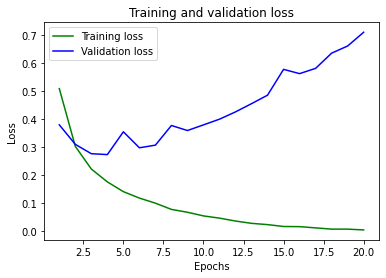

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

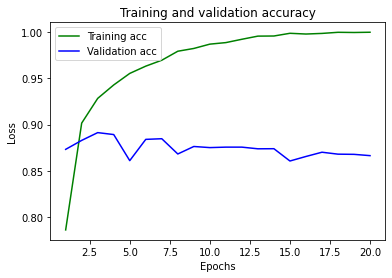

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'g', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We observe the loss starting to increase and the accuracy to slightly decrease for the validation set after *epoch 4*. So let's retrain a similar network, this time for just 4 epochs.

In [ ]:
network = models.Sequential()

network.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

network.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 36ms/step - loss: 0.4713 - accuracy: 0.8008
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.2643 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2019 - accuracy: 0.9290
Epoch 4/4
49/49 [==============================] - 2s 35ms/step - loss: 0.1659 - accuracy: 0.9418


In [ ]:
results = network.evaluate(x_test, y_test)
print(results)

network.predict(x_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.8833
[0.2942444980144501, 0.8832799792289734]


array([[0.21868265],
       [0.9977951 ],
       [0.77385753],
       ...,
       [0.12183392],
       [0.05491623],
       [0.6807475 ]], dtype=float32)

The first number in the results is the loss function (the binary crossentropy). The next numbers are the metrics, in our case it's just the accuracy. 

We therefore got an accuracy of 88%

In [ ]:
print(y_test[0:3], y_test[-3:])

[0. 1. 1.] [0. 0. 0.]


In [ ]:
print(decode_review(test_data[2]))
print(decode_review(test_data[-1]))
print(decode_review(test_data[-2]))

? many animation buffs consider ? ? the great forgotten genius of one special branch of the art puppet animation which he invented almost single ? and as it happened almost accidentally as a young man ? was more interested in ? than the cinema but his ? attempt to film two ? ? fighting led to an unexpected breakthrough in film making when he realized he could ? movement by ? beetle ? and ? them one frame at a time this discovery led to the production of amazingly elaborate classic short the ? revenge which he made in russia in ? at a time when motion picture animation of all sorts was in its ? br br the political ? of the russian revolution caused ? to move to paris where one of his first productions ? was a dark political satire ? known as ? or the ? who wanted a king a strain of black comedy can be found in almost all of films but here it is very dark indeed aimed more at grown ups who can appreciate the satirical aspects than children who would most likely find the climax ? i'm midd